In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
#Loading the dataset from my computer
df = pd.read_csv('dataset.csv')

In [3]:
# PREPROSSESING OF THE DATA

In [ ]:
print(df.columns)

In [ ]:
#checking the dataframes
df.info


In [ ]:
#To find the correlation between the numeric data, you can use a heatmap in Seaborn
# Select only the numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# To drop any rows with missing values
df.dropna(inplace=True)

In [17]:
#Checking data informatiom
df.info

<bound method DataFrame.info of      lab_ID lab_type  lab_capacity  user_ID course_of_study  occupancy  \
0         7        A            46       64              ME          8   
1         2        B            33       88              EE         89   
2         3        A            25       16              EE         34   
3         7        B            40       11              CS         20   
4         6        G            17       78              EE         54   
..      ...      ...           ...      ...             ...        ...   
995       9        e            29       91              ME         33   
996       5        d            41       81              EE         75   
997       8        s            28       98              CS          9   
998       7        f            46       89              CS         14   
999       5        d            41       57              EE         29   

              time_stamp  computer_ID  CPU_usage  memory_usage  disk_usage  
0 

In [19]:
#For Dynamic Resource Allocation, we can use linear regression to predict resource usage based on occupancy and course requirements:

Mean Squared Error:  833.1546201449133
R-squared:  0.0013363606284720886


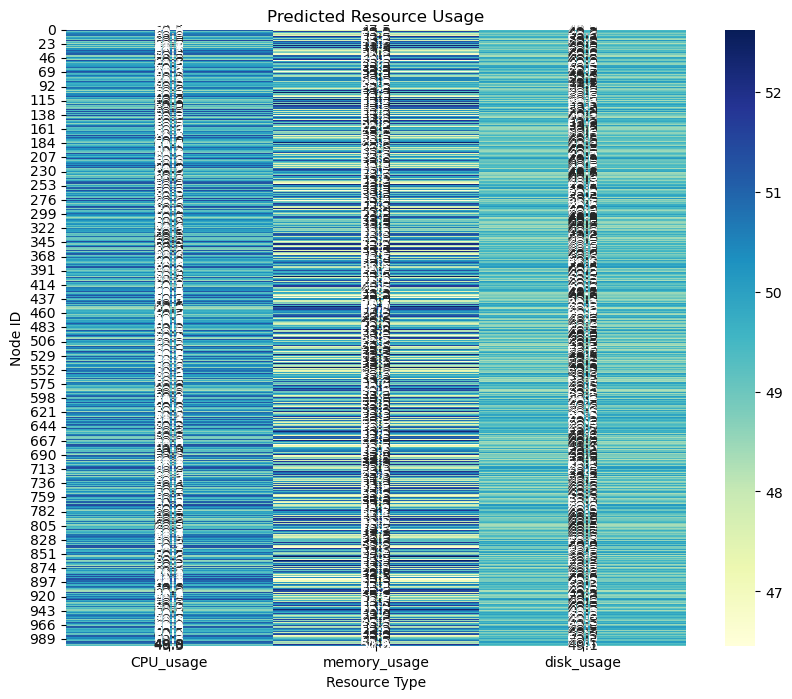

Predicted Usage:
   CPU_usage  memory_usage  disk_usage
0  48.542314     51.134335   48.314903
1  51.133982     47.509672   49.450456
2  49.451421     50.336423   49.114360
3  49.136846     51.594329   49.669384
4  50.063261     49.308513   49.236577


In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file
df = pd.read_csv('preprocessed_data.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Convert the time_stamp column to datetime format
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# Create a new column for the course start time
df['course_start_time'] = df['time_stamp'].apply(lambda x: x.replace(hour=np.random.randint(6, 10)))

# Create a new column for the course end time
df['course_end_time'] = df['course_start_time'].copy()
for i in range(len(df)):
    df.loc[i, 'course_end_time'] = df.loc[i, 'course_start_time'] + timedelta(hours=int(df.loc[i, 'course_duration']))

# Create a new column for the course attendance
df['course_attendance'] = np.random.randint(0, 100, size=len(df))

# Encode the string values in the course_of_study column as numerical values
le = LabelEncoder()
df['course_of_study'] = le.fit_transform(df['course_of_study'])

# Load the preprocessed dataset for training
X = df[['occupancy', 'course_of_study']]
y = df[['CPU_usage', 'memory_usage', 'disk_usage']]

lr = LinearRegression()
lr.fit(X, y)

predicted_usage = lr.predict(X)
# Calculate the accuracy
mse = mean_squared_error(y, predicted_usage)
r2 = r2_score(y, predicted_usage)

# Print the accuracy
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Create a matrix of the predicted usage
predicted_matrix = pd.DataFrame(predicted_usage, columns=['CPU_usage', 'memory_usage', 'disk_usage'])

# Create a heatmap of the predicted usage matrix
plt.figure(figsize=(10, 8))
sns.heatmap(predicted_matrix, annot=True, fmt=".1f", cmap="YlGnBu")

# Add labels and title
plt.xlabel("Resource Type")
plt.ylabel("Node ID")
plt.title("Predicted Resource Usage")

# Show the plot
plt.show()

# Print the predicted matrix
print("Predicted Usage:")
print(predicted_matrix.head())

Mean Squared Error: 833.1546201449133
R-squared: 0.0013363606284720886


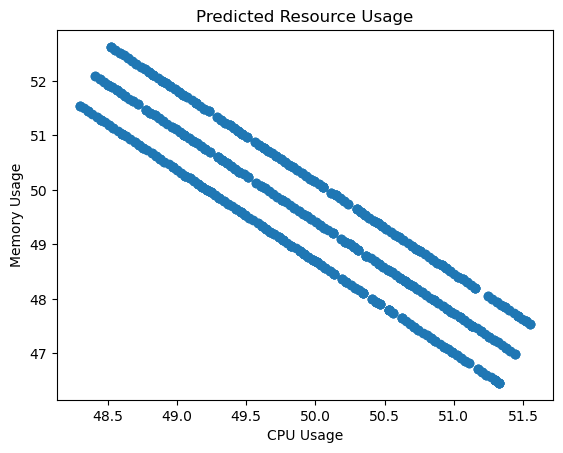

Predicted Usage:
   CPU_usage  memory_usage  disk_usage
0  48.542314     51.134335   48.314903
1  51.133982     47.509672   49.450456
2  49.451421     50.336423   49.114360
3  49.136846     51.594329   49.669384
4  50.063261     49.308513   49.236577


In [21]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Load the dataset from a CSV file
df = pd.read_csv('preprocessed_data.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Convert the time_stamp column to datetime format
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# Create a new column for the course start time
df['course_start_time'] = df['time_stamp'].apply(lambda x: x.replace(hour=np.random.randint(6, 10)))

# Create a new column for the course end time
df['course_end_time'] = df['course_start_time'].copy()
for i in range(len(df)):
    df.loc[i, 'course_end_time'] = df.loc[i, 'course_start_time'] + timedelta(hours=int(df.loc[i, 'course_duration']))

# Create a new column for the course attendance
df['course_attendance'] = np.random.randint(0, 100, size=len(df))

# Encode the string values in the course_of_study column as numerical values
le = LabelEncoder()
df['course_of_study'] = le.fit_transform(df['course_of_study'])

# Load the preprocessed dataset for training
X = df[['occupancy', 'course_of_study']]
y = df[['CPU_usage', 'memory_usage', 'disk_usage']]

lr = LinearRegression()
lr.fit(X, y)

predicted_usage = lr.predict(X)
# Calculate the accuracy
mse = mean_squared_error(y, predicted_usage)
r2 = r2_score(y, predicted_usage)


# Create a matrix of the predicted usage
predicted_matrix = pd.DataFrame(predicted_usage, columns=['CPU_usage', 'memory_usage', 'disk_usage'])

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume that `X` and `y` are the input and output data, respectively

# Train a linear regression model on the input and output data
model = LinearRegression()
model.fit(X, y)

# Make predictions on the input data
y_pred = model.predict(X)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the accuracy metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

import matplotlib.pyplot as plt

# Get the predicted CPU and memory usage
cpu_usage = predicted_usage[:, 0]
memory_usage = predicted_usage[:, 1]

# Create a scatter plot of the predicted CPU usage and memory usage
plt.scatter(cpu_usage, memory_usage)
plt.xlabel('CPU Usage')
plt.ylabel('Memory Usage')
plt.title('Predicted Resource Usage')
plt.show()

# Print the predicted matrix
print("Predicted Usage:")
print(predicted_matrix.head())

In [22]:
#For Dynamic Resource Allocation, we can use linear regression to predict resource usage based on occupancy and course requirements:

Mean Squared Error: 831.7982371007178
R-squared: 0.0029757652863512027


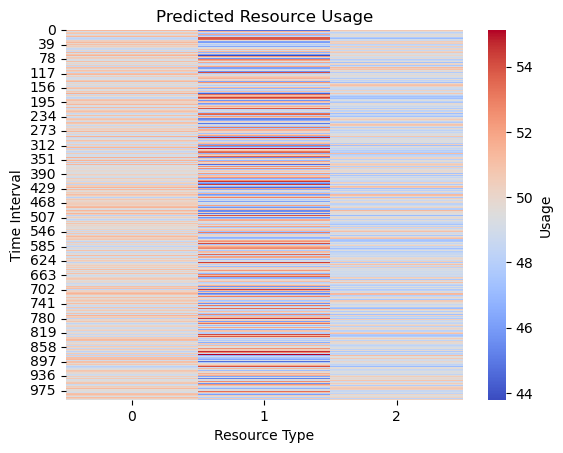

In [23]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file
df = pd.read_csv('preprocessed_data.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Convert the time_stamp column to datetime format
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# Create a new column for the course start time
df['course_start_time'] = df['time_stamp'].apply(lambda x: x.replace(hour=np.random.randint(6, 10)))

# Create a new column for the course end time
df['course_end_time'] = df['course_start_time'].copy()
for i in range(len(df)):
    df.loc[i, 'course_end_time'] = df.loc[i, 'course_start_time'] + timedelta(hours=int(df.loc[i, 'course_duration']))

# Create a new column for the course attendance
df['course_attendance'] = np.random.randint(0, 100, size=len(df))

# Encode the string values in the course_of_study column as numerical values
le = LabelEncoder()
df['course_of_study'] = le.fit_transform(df['course_of_study'])



# Split the data into input and output
X = df[['occupancy', 'course_of_study', 'course_duration']]
y = df[['CPU_usage', 'memory_usage', 'disk_usage']]

# Train a linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Make predictions on the input data
y_pred = lr.predict(X)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the accuracy metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the predicted usage matrix
p = sns.heatmap(y_pred, cmap='coolwarm')

# Add a title and labels to the plot
p.set_title('Predicted Resource Usage')
p.set_xlabel('Resource Type')
p.set_ylabel('Time Interval')

# Add a legend to the plot
cbar = p.collections[0].colorbar
cbar.set_label('Usage')

# Show the plot
plt.show()

Mean Squared Error: 833.1546201449133
R-squared: 0.0013363606284720886


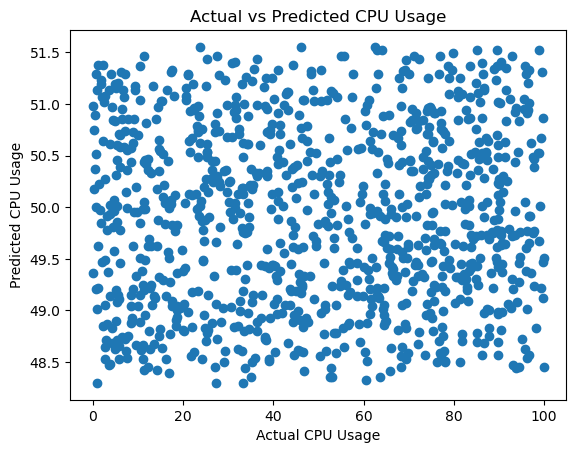

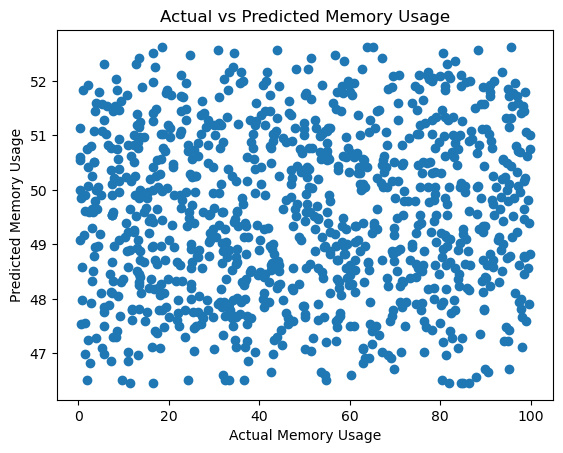

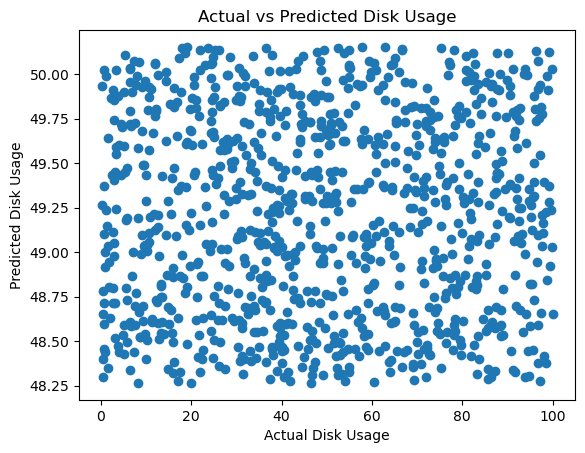

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file
df = pd.read_csv('preprocessed_data.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Convert the time_stamp column to datetime format
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# Create a new column for the course start time
df['course_start_time'] = df['time_stamp'].apply(lambda x: x.replace(hour=np.random.randint(6, 10)))

# Create a new column for the course end time
df['course_end_time'] = df['course_start_time'].copy()
for i in range(len(df)):
    df.loc[i, 'course_end_time'] = df.loc[i, 'course_start_time'] + timedelta(hours=int(df.loc[i, 'course_duration']))

# Create a new column for the course attendance
df['course_attendance'] = np.random.randint(0, 100, size=len(df))

# Encode the string values in the course_of_study column as numerical values
le = LabelEncoder()
df['course_of_study'] = le.fit_transform(df['course_of_study'])

# Load the preprocessed dataset for training
X = df[['occupancy', 'course_of_study']]
y = df[['CPU_usage', 'memory_usage', 'disk_usage']]


# Train a linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Make predictions on the input data
y_pred = lr.predict(X)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the accuracy metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Get the actual and predicted CPU usage
actual_cpu = y.iloc[:, 0]
predicted_cpu = y_pred[:, 0]

# Create a scatter plot of the actual and predicted CPU usage
plt.scatter(actual_cpu, predicted_cpu)
plt.xlabel('Actual CPU Usage')
plt.ylabel('Predicted CPU Usage')
plt.title('Actual vs Predicted CPU Usage')
plt.show()

# Get the actual and predicted memory usage
actual_memory = y.iloc[:, 1]
predicted_memory = y_pred[:, 1]

# Create a scatter plot of the actual and predicted memory usage
plt.scatter(actual_memory, predicted_memory)
plt.xlabel('Actual Memory Usage')
plt.ylabel('Predicted Memory Usage')
plt.title('Actual vs Predicted Memory Usage')
plt.show()

# Get the actual and predicted disk usage
actual_disk = y.iloc[:, 2]
predicted_disk = y_pred[:, 2]

# Create a scatter plot of the actual and predicted disk usage
plt.scatter(actual_disk, predicted_disk)
plt.xlabel('Actual Disk Usage')
plt.ylabel('Predicted Disk Usage')
plt.title('Actual vs Predicted Disk Usage')
plt.show()

In [25]:
print(df.columns)

Index(['lab_ID', 'lab_type', 'lab_capacity', 'user_ID', 'course_of_study',
       'occupancy', 'time_stamp', 'computer_ID', 'CPU_usage', 'memory_usage',
       'disk_usage', 'year', 'month', 'day', 'hour', 'minute', 'day_of_week',
       'quarter', 'month_name', 'hour_name', 'course_duration',
       'course_start_time', 'course_end_time', 'course_attendance'],
      dtype='object')


In [36]:
import pickle

# Save the model as a pickle file
with open('model2.pkl', 'wb') as f:
    pickle.dump(model, f)